In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn import datasets


Using TensorFlow backend.


In [2]:
np.random.seed(0)

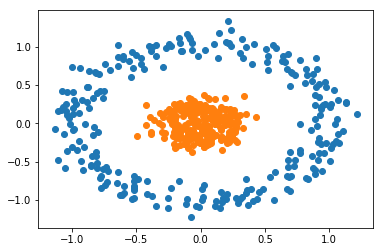

In [3]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123,noise=0.1,factor=0.2)
plt.scatter(X[y==0,0],X[y==0, 1])
plt.scatter(X[y==1,0],X[y==1, 1])

In [4]:
model = Sequential()
model.add(Dense(4,input_shape=(2,),activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.01), 'binary_crossentropy', metrics=['accuracy'])

In [5]:
h = model.fit(x=X, y=y, verbose = 1, epochs=100, batch_size=20,shuffle='true')

Epoch 1/100
500/500 [==============================] - 1s 1ms/step - loss: 0.6962 - acc: 0.5140
Epoch 2/100
500/500 [==============================] - 0s 84us/step - loss: 0.6938 - acc: 0.6180
Epoch 3/100
500/500 [==============================] - 0s 81us/step - loss: 0.6926 - acc: 0.5140
Epoch 4/100
500/500 [==============================] - 0s 79us/step - loss: 0.6916 - acc: 0.6760
Epoch 5/100
500/500 [==============================] - 0s 81us/step - loss: 0.6905 - acc: 0.6340
Epoch 6/100
500/500 [==============================] - 0s 80us/step - loss: 0.6890 - acc: 0.3640
Epoch 7/100
500/500 [==============================] - 0s 80us/step - loss: 0.6865 - acc: 0.6500
Epoch 8/100
500/500 [==============================] - 0s 83us/step - loss: 0.6838 - acc: 0.6740
Epoch 9/100
500/500 [==============================] - 0s 81us/step - loss: 0.6796 - acc: 0.7620
Epoch 10/100
500/500 [==============================] - 0s 80us/step - loss: 0.6733 - acc: 0.7980
Epoch 11/100
500/500 [========

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'epoch')

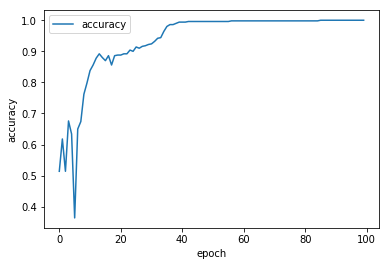

In [6]:
plt.plot(h.history['acc'])
plt.legend(['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 1.0, 'loss')

Text(0.5, 0, 'epoch')

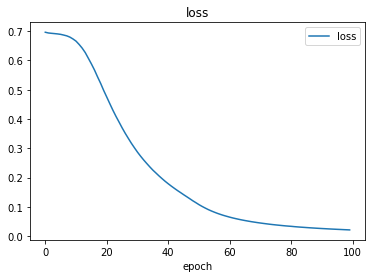

In [7]:
plt.plot(h.history['loss'])
plt.legend(['loss'])
plt.title('loss')
plt.xlabel('epoch')

In [8]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

Prediction is:  [[0.02531692]]


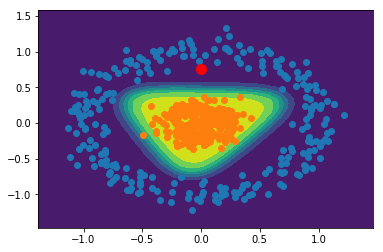

In [9]:
plot_decision_boundary(X, y, model)

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

x = 0
y = 0.75

point = np.array([[x, y]])
predict = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is: ", predict)